In [1]:
#add formatted_title and reads_url column in csv file
import pandas as pd
import json
from urllib.parse import quote
import urllib.request
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_wikipedia.csv')
df = df.fillna('')
titles_list = df['Page title'].tolist()
formatted_titles_list = []
reads_url_list = []
for title in titles_list:
    if title == '':
        formatted_title = ''
        reads_url = ''
        formatted_titles_list.append(formatted_title)
        reads_url_list.append(reads_url)
    else:   
        formatted_title = quote(title.replace(' ', '_'))
        reads_url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/user/{formatted_title}/monthly/20150701/20230731'
        formatted_titles_list.append(formatted_title)
        reads_url_list.append(reads_url)
df['formatted_title'] = formatted_titles_list
df['reads_url'] = reads_url_list
df.to_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_output.csv', index=False)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#scrape the reads data and write everything into a csv file
list_of_dicts = []
df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_output.csv')
df = df.fillna('')
reads_url_list = df['reads_url'].tolist()
for reads_url in reads_url_list:
        if reads_url == '':
                list_of_dicts.append([])
        else:
                with urllib.request.urlopen(reads_url) as url:
                        data = url.read().decode('utf-8')
                        items_dict = json.loads(data)
                        #print(items_dict)
                        
                        desired_keys = ['article', 'timestamp', 'views']
                        items_list = items_dict.get('items', [])
                        selected_data = []
                        for item in items_list:
                                selected_item = {key: item[key] for key in desired_keys if key in item}
                                selected_data.append(selected_item)
                        list_of_dicts.append(selected_data)
formatted_list = []
for list in list_of_dicts:
        if len(list) == 0: # if the list is empty (when the algo has no wikipedia page)
                formatted_list.append({})
        else:
                formatted_dict = {}
                for dict in list:
                        formatted_dict['formatted_title'] = dict['article']
                        formatted_dict[dict['timestamp']] = dict['views']
                formatted_list.append(formatted_dict)

df_output = pd.DataFrame(formatted_list)
df_output = df_output.drop('formatted_title', axis=1)
df_output['average_monthly_reads'] = df_output.mean(axis=1)
df_output.to_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/views.csv', index=False)
merged_df = pd.merge(df, df_output, left_index=True, right_index=True)
merged_df.to_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_output_views.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#merge the reads csv file with the original
df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_output_views.csv')
df = df.fillna('')

dict = df.to_dict(orient='records')

min_time_complexities = {}

# Iterate through the list of dictionaries and find min time complexity class for each family
for entry in dict:
    family_name = entry['Family Name']
    time_complexity_class = entry['Time Complexity Class']
    
    if family_name not in min_time_complexities:
        min_time_complexities[family_name] = time_complexity_class
    else:
        min_time_complexities[family_name] = min(min_time_complexities[family_name], time_complexity_class)

# Iterate through the list of dictionaries and add the min_time_complexity_class to each entry
for entry in dict:
    family_name = entry['Family Name']
    entry['min_time_complexity_class'] = min_time_complexities[family_name]
    if entry['min_time_complexity_class'] == entry['Time Complexity Class']:
        entry['is_optimal'] = True
    else:
        entry['is_optimal'] = False

df = pd.DataFrame(dict)
df.to_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv', index=False)

reads_all = []
reads_optimal = []
reads_not_optimal = []
total_optimal = 0
wiki_optimal = 0
total_algos = 0
for algo in dict:
    total_algos += 1
    if algo['2015070100'] != '':
        reads_all.append(float(algo['2015070100'] + algo['2015080100'] + algo['2015090100'] + algo['2015100100'] + algo['2015110100'] + algo['2015120100'] + algo['2016010100'] + algo['2016020100'] + algo['2016030100'] + algo['2016040100'] + algo['2016050100'] + algo['2016060100'] + algo['2016070100'] + algo['2016080100'] + algo['2016090100'] + algo['2016100100'] + algo['2016110100'] + algo['2016120100'] + algo['2017010100'] + algo['2017020100'] + algo['2017030100'] + algo['2017040100'] + algo['2017050100'] + algo['2017060100'] + algo['2017070100'] + algo['2017080100'] + algo['2017090100'] + algo['2017100100'] + algo['2017110100'] + algo['2017120100'] + algo['2018010100'] + algo['2018020100'] + algo['2018030100'] + algo['2018040100'] + algo['2018050100'] + algo['2018060100'] + algo['2018070100'] + algo['2018080100'] + algo['2018090100'] + algo['2018100100'] + algo['2018110100'] + algo['2018120100'] + algo['2019010100'] + algo['2019020100'] + algo['2019030100'] + algo['2019040100'] + algo['2019050100'] + algo['2019060100'] + algo['2019070100'] + algo['2019080100'] + algo['2019090100'] + algo['2019100100'] + algo['2019110100'] + algo['2019120100'] + algo['2020010100'] + algo['2020020100'] + algo['2020030100'] + algo['2020040100'] + algo['2020050100'] + algo['2020060100'] + algo['2020070100'] + algo['2020080100'] + algo['2020090100'] + algo['2020100100'] + algo['2020110100'] + algo['2020120100'] + algo['2021010100'] + algo['2021020100'] + algo['2021030100'] + algo['2021040100'] + algo['2021050100'] + algo['2021060100'] + algo['2021070100'] + algo['2021080100'] + algo['2021090100'] + algo['2021100100'] + algo['2021110100'] + algo['2021120100'] + algo['2022010100'] + algo['2022020100'] + algo['2022030100'] + algo['2022040100'] + algo['2022050100'] + algo['2022060100'] + algo['2022070100'] + algo['2022080100'] + algo['2022090100'] + algo['2022100100'] + algo['2022110100'] + algo['2022120100'] + algo['2023010100'] + algo['2023020100'] + algo['2023030100'] + algo['2023040100'] + algo['2023050100'] + algo['2023060100'] + algo['2023070100'])/97)
        if algo['is_optimal'] == True:
            wiki_optimal += 1
            reads_optimal.append(float(algo['2015070100'] + algo['2015080100'] + algo['2015090100'] + algo['2015100100'] + algo['2015110100'] + algo['2015120100'] + algo['2016010100'] + algo['2016020100'] + algo['2016030100'] + algo['2016040100'] + algo['2016050100'] + algo['2016060100'] + algo['2016070100'] + algo['2016080100'] + algo['2016090100'] + algo['2016100100'] + algo['2016110100'] + algo['2016120100'] + algo['2017010100'] + algo['2017020100'] + algo['2017030100'] + algo['2017040100'] + algo['2017050100'] + algo['2017060100'] + algo['2017070100'] + algo['2017080100'] + algo['2017090100'] + algo['2017100100'] + algo['2017110100'] + algo['2017120100'] + algo['2018010100'] + algo['2018020100'] + algo['2018030100'] + algo['2018040100'] + algo['2018050100'] + algo['2018060100'] + algo['2018070100'] + algo['2018080100'] + algo['2018090100'] + algo['2018100100'] + algo['2018110100'] + algo['2018120100'] + algo['2019010100'] + algo['2019020100'] + algo['2019030100'] + algo['2019040100'] + algo['2019050100'] + algo['2019060100'] + algo['2019070100'] + algo['2019080100'] + algo['2019090100'] + algo['2019100100'] + algo['2019110100'] + algo['2019120100'] + algo['2020010100'] + algo['2020020100'] + algo['2020030100'] + algo['2020040100'] + algo['2020050100'] + algo['2020060100'] + algo['2020070100'] + algo['2020080100'] + algo['2020090100'] + algo['2020100100'] + algo['2020110100'] + algo['2020120100'] + algo['2021010100'] + algo['2021020100'] + algo['2021030100'] + algo['2021040100'] + algo['2021050100'] + algo['2021060100'] + algo['2021070100'] + algo['2021080100'] + algo['2021090100'] + algo['2021100100'] + algo['2021110100'] + algo['2021120100'] + algo['2022010100'] + algo['2022020100'] + algo['2022030100'] + algo['2022040100'] + algo['2022050100'] + algo['2022060100'] + algo['2022070100'] + algo['2022080100'] + algo['2022090100'] + algo['2022100100'] + algo['2022110100'] + algo['2022120100'] + algo['2023010100'] + algo['2023020100'] + algo['2023030100'] + algo['2023040100'] + algo['2023050100'] + algo['2023060100'] + algo['2023070100'])/97)
        elif algo['is_optimal'] == False:
            reads_not_optimal.append(float(algo['2015070100'] + algo['2015080100'] + algo['2015090100'] + algo['2015100100'] + algo['2015110100'] + algo['2015120100'] + algo['2016010100'] + algo['2016020100'] + algo['2016030100'] + algo['2016040100'] + algo['2016050100'] + algo['2016060100'] + algo['2016070100'] + algo['2016080100'] + algo['2016090100'] + algo['2016100100'] + algo['2016110100'] + algo['2016120100'] + algo['2017010100'] + algo['2017020100'] + algo['2017030100'] + algo['2017040100'] + algo['2017050100'] + algo['2017060100'] + algo['2017070100'] + algo['2017080100'] + algo['2017090100'] + algo['2017100100'] + algo['2017110100'] + algo['2017120100'] + algo['2018010100'] + algo['2018020100'] + algo['2018030100'] + algo['2018040100'] + algo['2018050100'] + algo['2018060100'] + algo['2018070100'] + algo['2018080100'] + algo['2018090100'] + algo['2018100100'] + algo['2018110100'] + algo['2018120100'] + algo['2019010100'] + algo['2019020100'] + algo['2019030100'] + algo['2019040100'] + algo['2019050100'] + algo['2019060100'] + algo['2019070100'] + algo['2019080100'] + algo['2019090100'] + algo['2019100100'] + algo['2019110100'] + algo['2019120100'] + algo['2020010100'] + algo['2020020100'] + algo['2020030100'] + algo['2020040100'] + algo['2020050100'] + algo['2020060100'] + algo['2020070100'] + algo['2020080100'] + algo['2020090100'] + algo['2020100100'] + algo['2020110100'] + algo['2020120100'] + algo['2021010100'] + algo['2021020100'] + algo['2021030100'] + algo['2021040100'] + algo['2021050100'] + algo['2021060100'] + algo['2021070100'] + algo['2021080100'] + algo['2021090100'] + algo['2021100100'] + algo['2021110100'] + algo['2021120100'] + algo['2022010100'] + algo['2022020100'] + algo['2022030100'] + algo['2022040100'] + algo['2022050100'] + algo['2022060100'] + algo['2022070100'] + algo['2022080100'] + algo['2022090100'] + algo['2022100100'] + algo['2022110100'] + algo['2022120100'] + algo['2023010100'] + algo['2023020100'] + algo['2023030100'] + algo['2023040100'] + algo['2023050100'] + algo['2023060100'] + algo['2023070100'])/97)
    if algo['is_optimal'] == True:
            total_optimal += 1
# print('total number of algorithms on wikipedia: ' + str(len(reads_all)))
# print('number of optimal algorithms on wikipedia: ' + str(len(reads_optimal)))
# print('number of non-optimal algorithms on wikipedia: ' + str(len(reads_not_optimal)))
# print('average page reads for all algorithms on wikipedia: ' + str(np.mean(reads_all)))
# print('average page reads for optimal algorithms on wikipedia: ' + str(np.mean(reads_optimal)))
# print('average page reads for nonoptimal algorithms on wikipedia: ' + str(np.mean(reads_not_optimal)))
# print('fraction of optimal algorithms on wikipedia: ' + str(wiki_optimal/total_optimal))
# print('total number of optimal algorithms in Sheet1: ' + str(total_optimal))
# print('total number of algorithms in Sheet1: ' + str(total_algos))

# import numpy as np
# from scipy import stats

# t_stat, p_value = stats.ttest_ind(reads_optimal, reads_not_optimal)
# alpha = 0.05

# if p_value < alpha:
#     print('The p-value of ' + str(p_value) + ' is less than 0.05 so the result is statistically significant.')
# else:
#     print('The p-value of ' + str(p_value) + ' is greater than 0.05 so the result is not statistically significant.')

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# sns.histplot(reads_optimal, bins=14, kde=False, stat='percent', color='blue', edgecolor='black', ax=axes[0])
# axes[0].set_title('Number of Views for Wikipedia Pages about Optimal Algos')
# axes[0].set_xlabel('Number of Views')
# axes[0].set_ylabel('Percent')

# sns.histplot(reads_not_optimal, bins=14, kde=False, stat='percent', color='red', edgecolor='black', ax=axes[1])
# axes[1].set_title('Number of Views for Wikipedia Pages about Non-Optimal Algos')
# axes[1].set_xlabel('Number of Views')
# axes[1].set_ylabel('Percent')

# plt.tight_layout()
# plt.show()

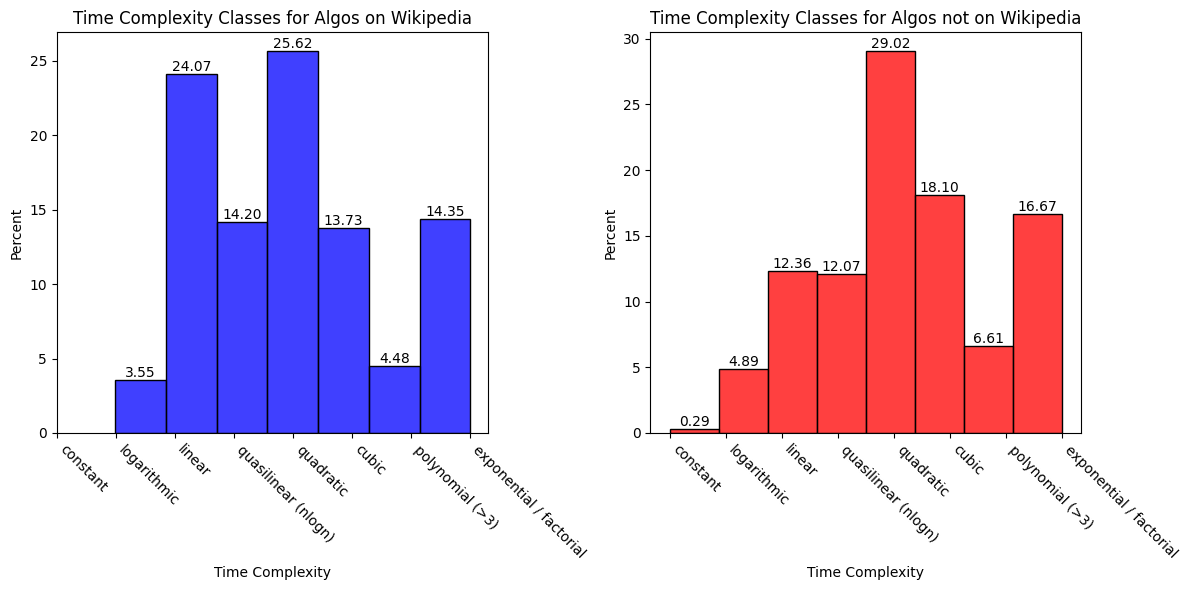

KS Statistic: 0.1165921668795232
P-value: 0.003822361908085234
The two datasets are significantly different (reject the null hypothesis)
Earth Mover's Distance: 0.37859916390751375
Chi-Squared Statistic: 20.738353593377475
P-value: 0.004177328387023681
The two datasets are significantly different (reject the null hypothesis)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import wasserstein_distance
from scipy.stats import chi2_contingency

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
merged_dict = df.to_dict(orient='records')

wiki_complexity_classes = []
non_wiki_complexity_classes = []
for algo in merged_dict:
    if algo['Time Complexity Class'] != '#VALUE!':
        if algo['One of them'] == 1:
            wiki_complexity_classes.append(float(algo['Time Complexity Class']))
        else:
            non_wiki_complexity_classes.append(float(algo['Time Complexity Class']))

bin_edges = [1, 2, 3, 4, 5, 6, 7, 8]
bin_labels = ['constant', 'logarithmic', 'linear', 'quasilinear (nlogn)', 'quadratic', 'cubic', 'polynomial (>3)', 'exponential / factorial']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the histogram for wiki_complexity_classes
ax1 = sns.histplot(wiki_complexity_classes, kde=False, bins=7, stat='percent', color='blue', edgecolor='black', ax=axes[0])
ax1.set_title('Time Complexity Classes for Algos on Wikipedia')
ax1.set_xlabel('Time Complexity')
ax1.set_ylabel('Percent')
ax1.set_xticks(bin_edges)
ax1.set_xticklabels(bin_labels, rotation=-45, ha='left')

# Add heights (percentages) on top of bars in the first subplot
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Plot the histogram for non_wiki_complexity_classes
ax2 = sns.histplot(non_wiki_complexity_classes, kde=False, bins=8, stat='percent', color='red', edgecolor='black', ax=axes[1])
ax2.set_title('Time Complexity Classes for Algos not on Wikipedia')
ax2.set_xlabel('Time Complexity')
ax2.set_ylabel('Percent')
ax2.set_xticks(bin_edges)
ax2.set_xticklabels(bin_labels, rotation=-45, ha='left')

# Add heights (percentages) on top of bars in the second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Perform K-S test:
ks_statistic, p_value = ks_2samp(wiki_complexity_classes, non_wiki_complexity_classes)

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("The two datasets are significantly different (reject the null hypothesis)")
else:
    print("There is no significant difference between the two datasets (fail to reject the null hypothesis)")

# Compute the Earth Mover's Distance (EMD)
emd_distance = wasserstein_distance(wiki_complexity_classes, non_wiki_complexity_classes)

print("Earth Mover's Distance:", emd_distance)

# Chi-squared test:
# Create a contingency table
observed_frequencies = np.array([[
    len([x for x in wiki_complexity_classes if x == class_label]),
    len([x for x in non_wiki_complexity_classes if x == class_label])
] for class_label in range(1, 9)])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(observed_frequencies)

print("Chi-Squared Statistic:", chi2)
print("P-value:", p)

# Interpret the result
alpha = 0.05  # Significance level
if p < alpha:
    print("The two datasets are significantly different (reject the null hypothesis)")
else:
    print("There is no significant difference between the two datasets (fail to reject the null hypothesis)")


One of them                 0         1
Time Complexity Bin                    
1                    0.002874  0.001543
2                    0.051724  0.033951
3                    0.123563  0.242284
4                    0.132184  0.143519
5                    0.310345  0.271605
6                    0.152299  0.123457
7                    0.060345  0.041667
8                    0.166667  0.141975


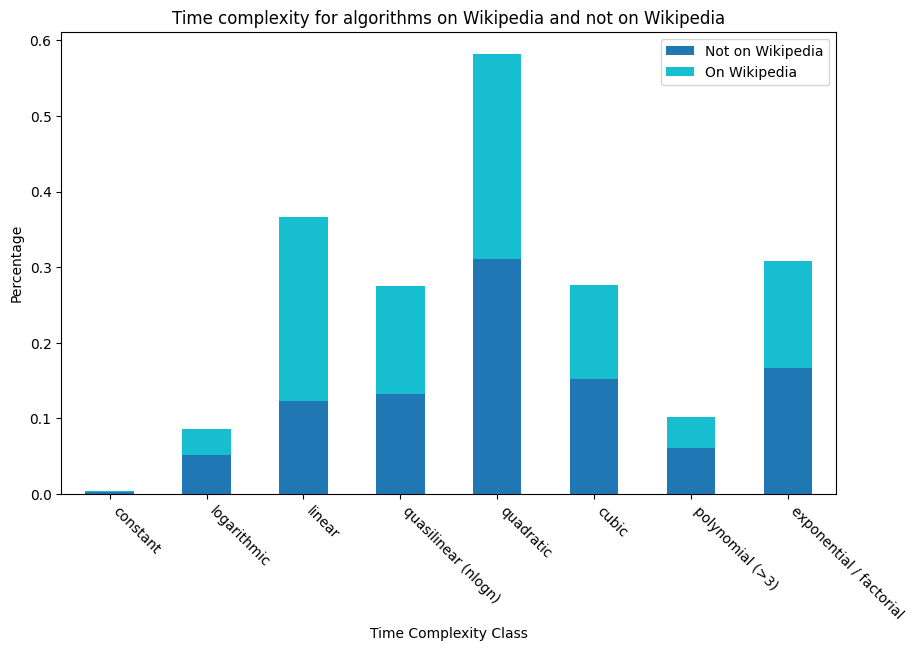

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
df = df[['One of them','Time Complexity Class']]
df = df.replace('#VALUE!', pd.NA).dropna()
df['Time Complexity Class'] = df['Time Complexity Class'].astype(float)
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['Time Complexity Class'] < 2:
        algo['Time Complexity Bin'] = 1
    elif algo['Time Complexity Class'] < 3:
        algo['Time Complexity Bin'] = 2
    elif algo['Time Complexity Class'] < 4:
        algo['Time Complexity Bin'] = 3
    elif algo['Time Complexity Class'] < 5:
        algo['Time Complexity Bin'] = 4
    elif algo['Time Complexity Class'] < 6:
        algo['Time Complexity Bin'] = 5
    elif algo['Time Complexity Class'] < 7:
        algo['Time Complexity Bin'] = 6
    elif algo['Time Complexity Class'] < 8:
        algo['Time Complexity Bin'] = 7
    elif algo['Time Complexity Class'] < 9:
        algo['Time Complexity Bin'] = 8
df = pd.DataFrame(merged_dict)



grouped = df.groupby(['Time Complexity Bin','One of them']).size().unstack(fill_value=0)
dict = grouped.to_dict()

total_not_in_wiki = dict[0][1] + dict[0][2] + dict[0][3] + dict[0][4] + dict[0][5] + dict[0][6] + dict[0][7] + dict[0][8]
total_in_wiki = dict[1][1] + dict[1][2] + dict[1][3] + dict[1][4] + dict[1][5] + dict[1][6] + dict[1][7] + dict[1][8]

grouped[0] = grouped[0] / total_not_in_wiki
grouped[1] = grouped[1] / total_in_wiki
print(grouped)


# Create a stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

plt.xlabel('Time Complexity Class')
plt.ylabel('Percentage')
plt.title('Time complexity for algorithms on Wikipedia and not on Wikipedia')
plt.legend(title='One of them')

bin_labels = ['constant', 'logarithmic', 'linear', 'quasilinear (nlogn)', 'quadratic', 'cubic', 'polynomial (>3)', 'exponential / factorial']

ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=-45, ha = 'left')

custom_legend_labels = {0: 'Not on Wikipedia', 1: 'On Wikipedia'}
legend = plt.legend(custom_legend_labels.values())

0
1
2
3
4
5
6
7
0.6666666666666667


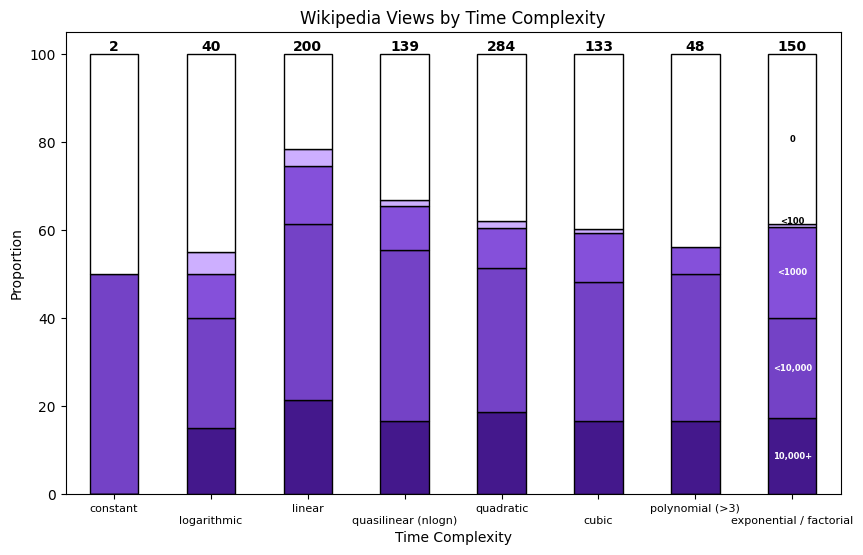

In [ ]:
#Option 1
#divide up bars by views

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
df = df[['average_monthly_reads','Time Complexity Class']]
df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
df['average_monthly_reads'] = df['average_monthly_reads'].fillna(0)
df = df.dropna()
# print(df)
# df.to_csv('output.csv')
num_bins = 5
df = df.astype(float)
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['Time Complexity Class'] < 2:
        algo['Time Complexity Bin'] = 1
    elif algo['Time Complexity Class'] < 3:
        algo['Time Complexity Bin'] = 2
    elif algo['Time Complexity Class'] < 4:
        algo['Time Complexity Bin'] = 3
    elif algo['Time Complexity Class'] < 5:
        algo['Time Complexity Bin'] = 4
    elif algo['Time Complexity Class'] < 6:
        algo['Time Complexity Bin'] = 5
    elif algo['Time Complexity Class'] < 7:
        algo['Time Complexity Bin'] = 6
    elif algo['Time Complexity Class'] < 8:
        algo['Time Complexity Bin'] = 7
    elif algo['Time Complexity Class'] < 9:
        algo['Time Complexity Bin'] = 8
    
    if algo['average_monthly_reads'] == 0:
        algo['reads_bin'] = 4
    elif algo['average_monthly_reads'] <100:
        algo['reads_bin'] = 3
    elif algo['average_monthly_reads'] <1000:
        algo['reads_bin'] = 2
    elif algo['average_monthly_reads'] <10000:
        algo['reads_bin'] = 1
    elif algo['average_monthly_reads'] >=10000:
        algo['reads_bin'] = 0

df = pd.DataFrame(merged_dict)

crosstb_prop = pd.crosstab(df["Time Complexity Bin"], df['reads_bin'], normalize="index")
crosstb_prop *= 100
crosstb = pd.crosstab(df["Time Complexity Bin"], df['reads_bin'])

# crosstb.to_csv('/Users/bellasteedly/Desktop/results.csv')

# crosstb_prop = crosstb_prop.reindex([3,4,5,8,6,7,2,1])
# crosstb = crosstb.reindex([3,4,5,8,6,7,2,1])


crosstb_prop.plot(kind='bar', stacked=True, color=['#44188c', '#7442c6', '#8550da', '#cdafff', '#ffffff'], edgecolor='black', figsize=(10, 6))

# #legend
# plt.legend(["10,000+", "<10,000", "<1,000", "<100", "Not on Wikipedia"], loc="upper right", ncol=2, fontsize = 'x-small').set_title('Wikipedia monthly views')


#title and axes
plt.xlabel("Time Complexity")
plt.title('Wikipedia Views by Time Complexity')
plt.ylabel("Proportion")

bin_labels = ['constant', '\nlogarithmic', 'linear', '\nquasilinear (nlogn)', 'quadratic', '\ncubic', 'polynomial (>3)', '\nexponential / factorial']

# # Set the x-ticks and x-tick labels
ax = plt.gca()
ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=0, ha='center')
ax.tick_params(axis='x', labelsize=8)
ax.get_legend().remove()

for n, x in enumerate([*crosstb_prop.index.values]):
    sum = 0
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
        sum += count
    plt.text(x=n,
                 y=(y_loc),
                 s=sum, 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=10,
                 fontweight="bold")


y = 0
for n, x in enumerate([*crosstb_prop.index.values]):
    total = 0
    print(n)
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
        if (n==7) & (proportion != 0) & ((y % num_bins == num_bins-1)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='0', 
                 color="black",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (n==7) & (proportion != 0) & ((y % num_bins == num_bins-2)):
            print(proportion)
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='<100', 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=6,
                 fontweight="bold")
        elif (n==7) & (proportion != 0) & ((y % num_bins == num_bins-3)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='<1000', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (n==7) & (proportion != 0) & ((y % num_bins == num_bins-4)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='<10,000', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (n==7) & (proportion != 0) & ((y % num_bins == num_bins-5)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='10,000+', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        y+=1

# plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/new/time_complexity_wikipedia.pdf')

0
1
5.0
2
4.0
3
1.4388489208633095
4
1.4084507042253522
5
0.7518796992481203
6
7
0.6666666666666667


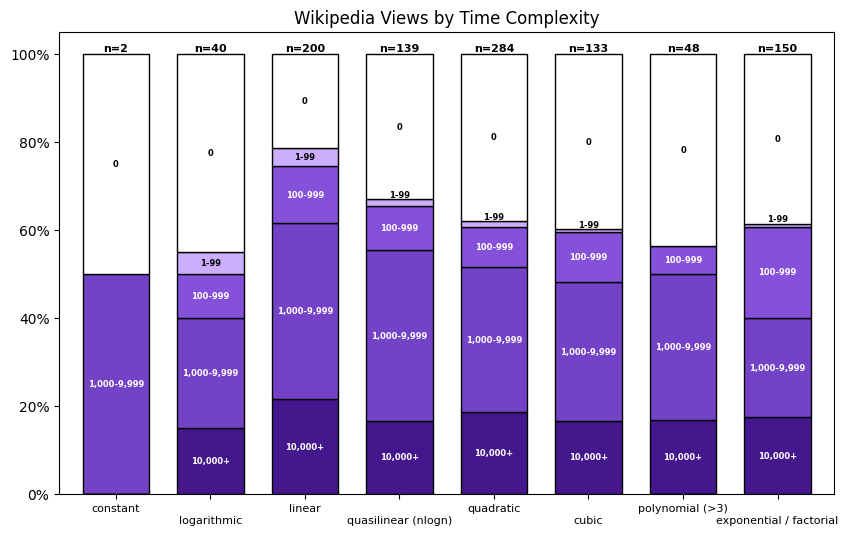

In [ ]:
#Option 2
#divide up bars by views

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
df = df[['average_monthly_reads','Time Complexity Class']]
df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
df['average_monthly_reads'] = df['average_monthly_reads'].fillna(0)
df = df.dropna()
# print(df)
# df.to_csv('output.csv')
num_bins = 5
df = df.astype(float)
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['Time Complexity Class'] < 2:
        algo['Time Complexity Bin'] = 1
    elif algo['Time Complexity Class'] < 3:
        algo['Time Complexity Bin'] = 2
    elif algo['Time Complexity Class'] < 4:
        algo['Time Complexity Bin'] = 3
    elif algo['Time Complexity Class'] < 5:
        algo['Time Complexity Bin'] = 4
    elif algo['Time Complexity Class'] < 6:
        algo['Time Complexity Bin'] = 5
    elif algo['Time Complexity Class'] < 7:
        algo['Time Complexity Bin'] = 6
    elif algo['Time Complexity Class'] < 8:
        algo['Time Complexity Bin'] = 7
    elif algo['Time Complexity Class'] < 9:
        algo['Time Complexity Bin'] = 8
    
    if algo['average_monthly_reads'] == 0:
        algo['reads_bin'] = 4
    elif algo['average_monthly_reads'] <100:
        algo['reads_bin'] = 3
    elif algo['average_monthly_reads'] <1000:
        algo['reads_bin'] = 2
    elif algo['average_monthly_reads'] <10000:
        algo['reads_bin'] = 1
    elif algo['average_monthly_reads'] >=10000:
        algo['reads_bin'] = 0

df = pd.DataFrame(merged_dict)

crosstb_prop = pd.crosstab(df["Time Complexity Bin"], df['reads_bin'], normalize="index")
crosstb_prop *= 100
crosstb = pd.crosstab(df["Time Complexity Bin"], df['reads_bin'])

# crosstb.to_csv('/Users/bellasteedly/Desktop/results.csv')

# crosstb_prop = crosstb_prop.reindex([3,4,5,8,6,7,2,1])
# crosstb = crosstb.reindex([3,4,5,8,6,7,2,1])


crosstb_prop.plot(kind='bar', stacked=True, color=['#44188c', '#7442c6', '#8550da', '#cdafff', '#ffffff'], edgecolor='black', figsize=(10, 6), width=0.7)

# #legend
# plt.legend(["10,000+", "<10,000", "<1,000", "<100", "Not on Wikipedia"], loc="upper right", ncol=2, fontsize = 'x-small').set_title('Wikipedia monthly views')


#title and axes
plt.xlabel("Time Complexity")
plt.title('Wikipedia Views by Time Complexity')

bin_labels = ['constant', '\nlogarithmic', 'linear', '\nquasilinear (nlogn)', 'quadratic', '\ncubic', 'polynomial (>3)', '\nexponential / factorial']

# # Set the x-ticks and x-tick labels
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.set_xlabel('')

ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=0, ha='center')
ax.tick_params(axis='x', labelsize=8)
ax.get_legend().remove()

for n, x in enumerate([*crosstb_prop.index.values]):
    sum = 0
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
        sum += count
    plt.text(x=n,
                 y=(y_loc),
                 s="n=" + str(sum), 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=8,
                 fontweight="bold")


y = 0
for n, x in enumerate([*crosstb_prop.index.values]):
    total = 0
    print(n)
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
        if (proportion != 0) & ((y % num_bins == num_bins-1)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='0', 
                 color="black",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion < 2) & (proportion != 0) & ((y % num_bins == num_bins-2)):
            print(proportion)
            plt.text(x=n,
                 y=(y_loc),
                 s='1-99', 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-2)):
            print(proportion)
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='1-99', 
                 color="black",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-3)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='100-999', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-4)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='1,000-9,999', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-5)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='10,000+', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        y+=1

#plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/time_complexity_views.pdf')

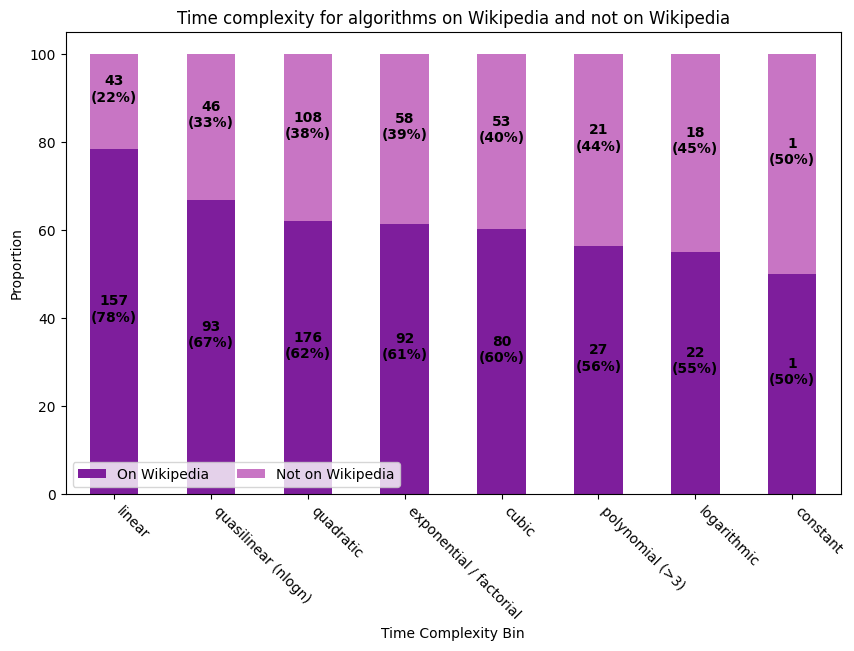

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_output_views.csv')
df = df[['One of them','Time Complexity Class']]
df = df.replace('#VALUE!', pd.NA).dropna()
df['Time Complexity Class'] = df['Time Complexity Class'].astype(float)
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['Time Complexity Class'] < 2:
        algo['Time Complexity Bin'] = 1
    elif algo['Time Complexity Class'] < 3:
        algo['Time Complexity Bin'] = 2
    elif algo['Time Complexity Class'] < 4:
        algo['Time Complexity Bin'] = 3
    elif algo['Time Complexity Class'] < 5:
        algo['Time Complexity Bin'] = 4
    elif algo['Time Complexity Class'] < 6:
        algo['Time Complexity Bin'] = 5
    elif algo['Time Complexity Class'] < 7:
        algo['Time Complexity Bin'] = 6
    elif algo['Time Complexity Class'] < 8:
        algo['Time Complexity Bin'] = 7
    elif algo['Time Complexity Class'] < 9:
        algo['Time Complexity Bin'] = 8
    if algo['One of them'] == 1:
        algo['Not on Wikipedia'] = 0
    elif algo['One of them'] == 0:
        algo['Not on Wikipedia'] = 1

df = pd.DataFrame(merged_dict)
# print(df)
# df.to_csv('/Users/bellasteedly/Desktop/results.csv')

crosstb_prop = pd.crosstab(df["Time Complexity Bin"], df['Not on Wikipedia'], normalize="index")
crosstb_prop *= 100
crosstb = pd.crosstab(df["Time Complexity Bin"], df['Not on Wikipedia'])

crosstb.to_csv('/Users/bellasteedly/Desktop/results.csv')

crosstb_prop = crosstb_prop.reindex([3,4,5,8,6,7,2,1])
crosstb = crosstb.reindex([3,4,5,8,6,7,2,1])


crosstb_prop.plot(kind='bar', stacked=True, color=['#7E1E9C', '#C875C4'], figsize=(10, 6))

#legend
plt.legend(["On Wikipedia", "Not on Wikipedia"], loc="lower left", ncol=2)

#title and axes
plt.xlabel("Time Complexity Bin")
plt.title('Time complexity for algorithms on Wikipedia and not on Wikipedia')
plt.ylabel("Proportion")

bin_labels = ["linear", "quasilinear (nlogn)", "quadratic", "exponential / factorial", "cubic", "polynomial (>3)", "logarithmic", "constant"]

# # Set the x-ticks and x-tick labels
ax = plt.gca()
ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=-45, ha='left')

for n, x in enumerate([*crosstb_prop.index.values]):
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
                
        plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({int(round(proportion, 0))}%)', 
                 color="black",
                 ha='center',
                 fontsize=10,
                 fontweight="bold")
plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/new/time_complexity_wikipedia.pdf')

{0: {'Bioinformatics': 16, 'Combinatorics': 170, 'Cryptography': 0, 'Databases': 20, 'Image Processing': 80, 'Numerical Analysis': 54, 'Operating Systems': 11, 'Robotics': 20, 'Signal Processing': 6, 'Statistics': 6}, 1: {'Bioinformatics': 23, 'Combinatorics': 271, 'Cryptography': 18, 'Databases': 3, 'Image Processing': 122, 'Numerical Analysis': 119, 'Operating Systems': 38, 'Robotics': 29, 'Signal Processing': 5, 'Statistics': 29}}


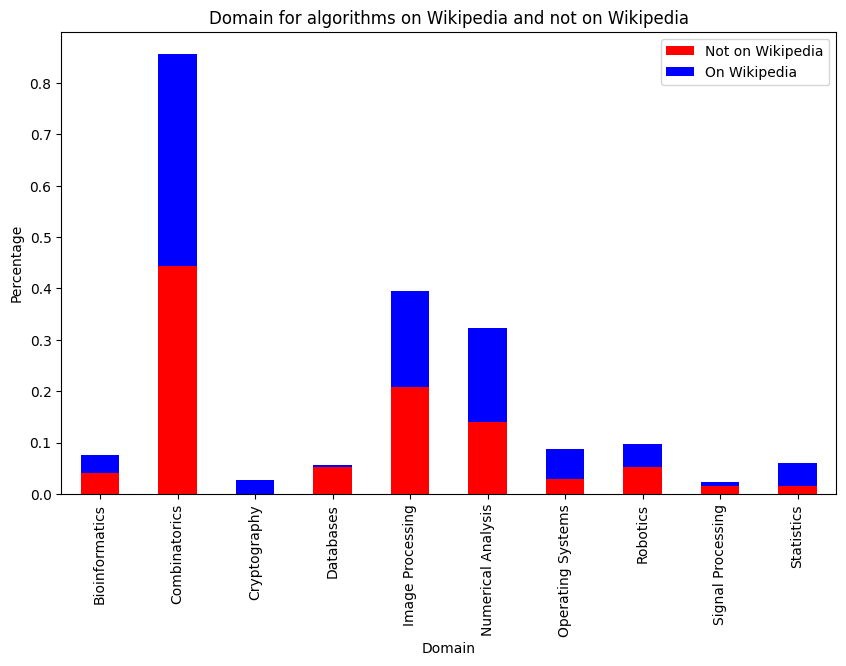

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')

df = df[['One of them','Domains']]
df = df.replace('#VALUE!', pd.NA).dropna()
merged_dict = df.to_dict(orient='records')
df = pd.DataFrame(merged_dict)

grouped = df.groupby(['Domains','One of them']).size().unstack(fill_value=0)
dict = grouped.to_dict()

total_not_in_wiki = dict[0]['Bioinformatics'] + dict[0]['Combinatorics'] + dict[0]['Cryptography'] + dict[0]['Databases'] + dict[0]['Image Processing'] + dict[0]['Numerical Analysis'] + dict[0]['Operating Systems'] + dict[0]['Robotics'] + dict[0]['Signal Processing'] + dict[0]['Statistics']
total_in_wiki = dict[1]['Bioinformatics'] + dict[1]['Combinatorics'] + dict[1]['Cryptography'] + dict[1]['Databases'] + dict[1]['Image Processing'] + dict[1]['Numerical Analysis'] + dict[1]['Operating Systems'] + dict[1]['Robotics'] + dict[1]['Signal Processing'] + dict[1]['Statistics']

grouped[0] = grouped[0] / total_not_in_wiki
grouped[1] = grouped[1] / total_in_wiki


ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue'])

plt.xlabel('Domain')
plt.ylabel('Percentage')
plt.title('Domain for algorithms on Wikipedia and not on Wikipedia')

custom_legend_labels = {0: 'Not on Wikipedia', 1: 'On Wikipedia'}
legend = plt.legend(custom_legend_labels.values())



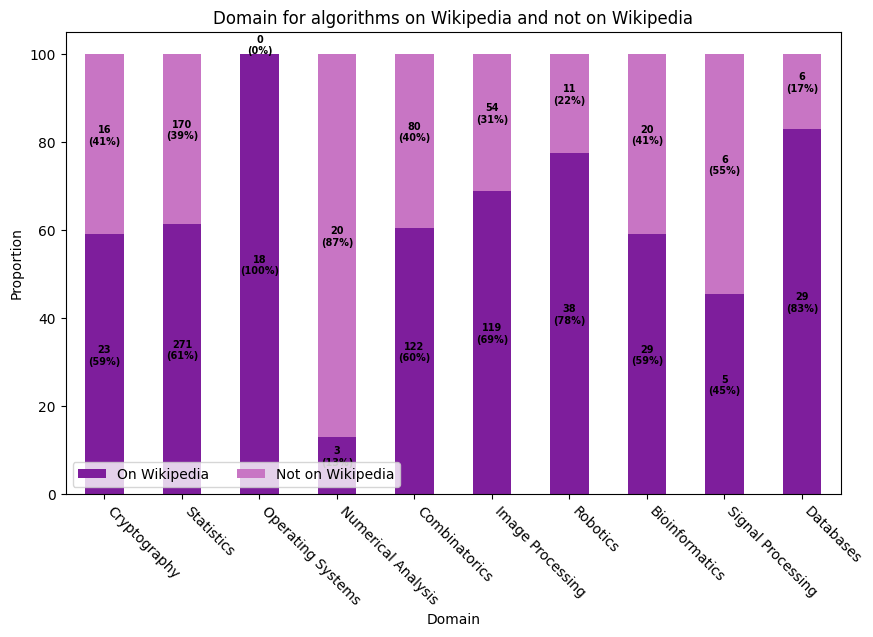

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/sheet1_output_views.csv')
df = df[['One of them','Domains']]
df = df.replace('#VALUE!', pd.NA).dropna()
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['One of them'] == 1:
        algo['Wikipedia?'] = 'On Wikipedia'
    elif algo['One of them'] == 0:
        algo['Wikipedia?'] = 'Not on Wikipedia'

df = pd.DataFrame(merged_dict)

cross_tab = pd.crosstab(index=df['Domains'], columns=df['Wikipedia?'])
cross_tab.to_csv('/Users/bellasteedly/Desktop/results.csv')
# cross_tab = cross_tab.reindex(["Cryptography", "Statistics", "Operating Systems", "Numerical Analysis", "Combinatorics", "Image Processing", "Robotics", "Bioinformatics", "Signal Processing", "Databases"], axis=0)

cross_tab_prop = pd.crosstab(index=df['Domains'], columns=df['Wikipedia?'], normalize="index")

cross_tab_prop = cross_tab_prop[['On Wikipedia', 'Not on Wikipedia']]
cross_tab = cross_tab[['On Wikipedia', 'Not on Wikipedia']]

# cross_tab_prop = cross_tab_prop.reindex(["Cryptography", "Statistics", "Operating Systems", "Numerical Analysis", "Combinatorics", "Image Processing", "Robotics", "Bioinformatics", "Signal Processing", "Databases"], axis=0)
cross_tab_prop *= 100

cross_tab_prop.plot(kind='bar', stacked=True, color=['#7E1E9C', '#C875C4'], figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Domain")
plt.title("Domain for algorithms on Wikipedia and not on Wikipedia")
plt.ylabel("Proportion")

# bin_labels = ["Cryptography", "Statistics", "Operating Systems", "Numerical Analysis", "Combinatorics", "Image Processing", "Robotics", "Bioinformatics", "Signal Processing", "Databases"]

# Set the x-ticks and x-tick labels
ax = plt.gca()
# ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=-45, ha='left')

legend_labels = ['On Wikipedia', 'Not on Wikipedia']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc="lower left", ncol=2)

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()): 
        plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({int(round(proportion, 0))}%)', 
                 color="black",
                 fontsize=7,
                 ha='center',
                 fontweight="bold")

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/new/domain_wikipedia.pdf')

0
17.94871794871795
1
1.3605442176870748
2
5.555555555555555
3
4
0.49504950495049505
5
1.1560693641618496
6
2.0408163265306123
7
8
9


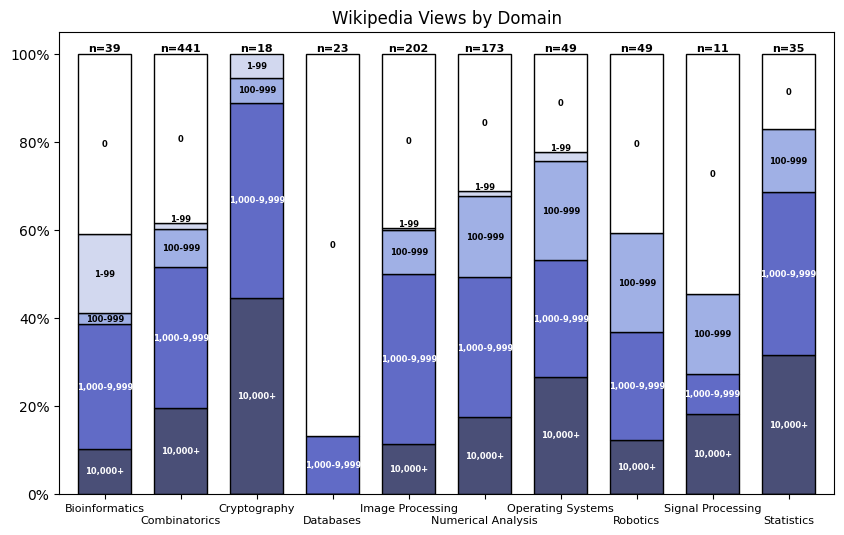

In [ ]:
#Option 2
#divide up bars by views

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
df = df[['average_monthly_reads','Domains']]
df['Domains'] = df['Domains'].replace('#VALUE!', pd.NA)
df['average_monthly_reads'] = df['average_monthly_reads'].fillna(0)
df = df.dropna()
num_bins = 5
merged_dict = df.to_dict(orient='records')
for algo in merged_dict: 
    if algo['average_monthly_reads'] == 0:
        algo['reads_bin'] = 4
    elif algo['average_monthly_reads'] <100:
        algo['reads_bin'] = 3
    elif algo['average_monthly_reads'] <1000:
        algo['reads_bin'] = 2
    elif algo['average_monthly_reads'] <10000:
        algo['reads_bin'] = 1
    elif algo['average_monthly_reads'] >=10000:
        algo['reads_bin'] = 0

df = pd.DataFrame(merged_dict)

crosstb_prop = pd.crosstab(df["Domains"], df['reads_bin'], normalize="index")
crosstb_prop *= 100
crosstb = pd.crosstab(df["Domains"], df['reads_bin'])


crosstb_prop.plot(kind='bar', stacked=True, color=['#4a4f77', '#616bc6', '#a0b0e5', '#d2d8ef', '#ffffff'], edgecolor='black', figsize=(10, 6), width=0.7)


#title
plt.title('Wikipedia Views by Domain')


# # Set the x-ticks and x-tick labels
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.set_xlabel('')

bin_labels = ["Bioinformatics", "\nCombinatorics", "Cryptography", "\nDatabases", "Image Processing", "\nNumerical Analysis", "Operating Systems", "\nRobotics", "Signal Processing", "\nStatistics"]
ax.set_xticklabels(bin_labels, rotation=0, ha='center')
ax.tick_params(axis='x', labelsize=8)
ax.get_legend().remove()

for n, x in enumerate([*crosstb_prop.index.values]):
    sum = 0
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
        sum += count
    plt.text(x=n,
                 y=(y_loc),
                 s="n=" + str(sum), 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=8,
                 fontweight="bold")


y = 0
for n, x in enumerate([*crosstb_prop.index.values]):
    total = 0
    print(n)
    for (proportion, count, y_loc) in zip(crosstb_prop.loc[x],
                                          crosstb.loc[x],
                                          crosstb_prop.loc[x].cumsum()):
        if (proportion != 0) & ((y % num_bins == num_bins-1)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='0', 
                 color="black",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion < 3) & (proportion != 0) & ((y % num_bins == num_bins-2)):
            print(proportion)
            plt.text(x=n,
                 y=(y_loc),
                 s='1-99', 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-2)):
            print(proportion)
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='1-99', 
                 color="black",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-3)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='100-999', 
                 color="black",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-4)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='1,000-9,999', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        elif (proportion != 0) & ((y % num_bins == num_bins-5)):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s='10,000+', 
                 color="white",
                 ha='center',
                 va='center',
                 fontsize=6,
                 fontweight="bold")
        y+=1

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/domain_views.pdf')

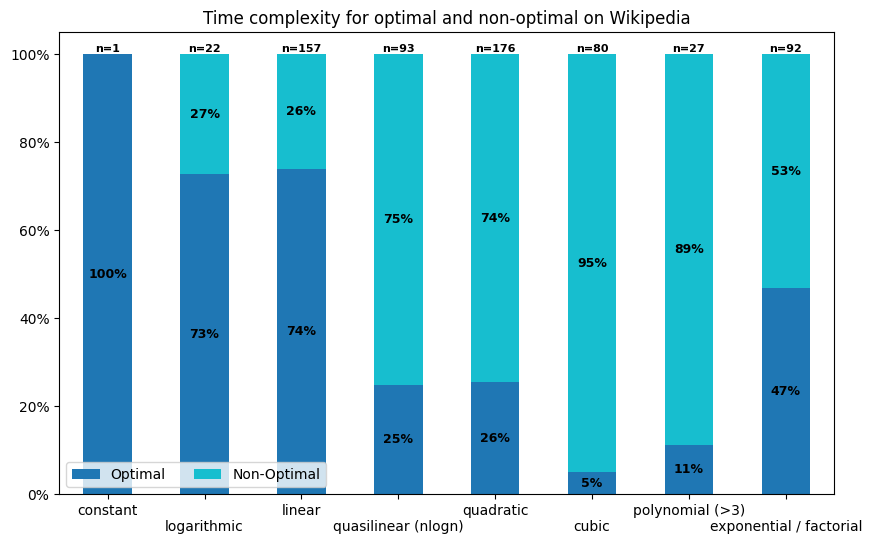

In [ ]:
# What fraction of Wikipedia algorithms are optimal by time complexity?

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
df = df[['One of them','is_optimal','Time Complexity Class']]
df = df.replace('#VALUE!', pd.NA).dropna()
df['Time Complexity Class'] = df['Time Complexity Class'].astype(float)
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['Time Complexity Class'] < 2:
        algo['Time Complexity Bin'] = 1
    elif algo['Time Complexity Class'] < 3:
        algo['Time Complexity Bin'] = 2
    elif algo['Time Complexity Class'] < 4:
        algo['Time Complexity Bin'] = 3
    elif algo['Time Complexity Class'] < 5:
        algo['Time Complexity Bin'] = 4
    elif algo['Time Complexity Class'] < 6:
        algo['Time Complexity Bin'] = 5
    elif algo['Time Complexity Class'] < 7:
        algo['Time Complexity Bin'] = 6
    elif algo['Time Complexity Class'] < 8:
        algo['Time Complexity Bin'] = 7
    elif algo['Time Complexity Class'] < 9:
        algo['Time Complexity Bin'] = 8
    if algo['is_optimal'] == 1:
        algo['optimal?'] = 'Optimal'
    elif algo['is_optimal'] == 0:
        algo['optimal?'] = 'Non-Optimal'
df = pd.DataFrame(merged_dict)
df = df.loc[df['One of them'] == 1]
df.to_csv('/Users/bellasteedly/Desktop/results.csv')

cross_tab = pd.crosstab(index=df['Time Complexity Bin'], columns=df['optimal?'])
# cross_tab = cross_tab.reindex([1,3,2,8,5,4,7,6])
cross_tab = cross_tab[['Optimal', 'Non-Optimal']]

cross_tab_prop = pd.crosstab(index=df['Time Complexity Bin'], columns=df['optimal?'], normalize="index")
# cross_tab_prop = cross_tab_prop.reindex([1,3,2,8,5,4,7,6])
cross_tab_prop = cross_tab_prop[['Optimal', 'Non-Optimal']]
cross_tab_prop *= 100
cross_tab_prop.to_csv('/Users/bellasteedly/Desktop/results.csv')

cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

bin_labels = ['constant', '\nlogarithmic', 'linear', '\nquasilinear (nlogn)', 'quadratic', '\ncubic', 'polynomial (>3)', '\nexponential / factorial']

plt.legend(loc="lower left", ncol=2)
plt.xlabel('')
plt.title('Time complexity for optimal and non-optimal on Wikipedia')

# Set the x-ticks and x-tick labels
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=0, ha='center')

legend_labels = ['Optimal', 'Non-Optimal']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc="lower left", ncol=2)

for n, x in enumerate([*cross_tab_prop.index.values]):
    sum = 0
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        sum += count
    plt.text(x=n,
                 y=(y_loc),
                 s="n=" + str(sum), 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=8,
                 fontweight="bold")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()): 
        if (count != 0):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{int(round(proportion, 0))}%',  
                 color="black",
                 fontsize=9,
                 ha='center',
                 va='center',
                 fontweight="bold")

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/time_complexity_optimal.pdf')


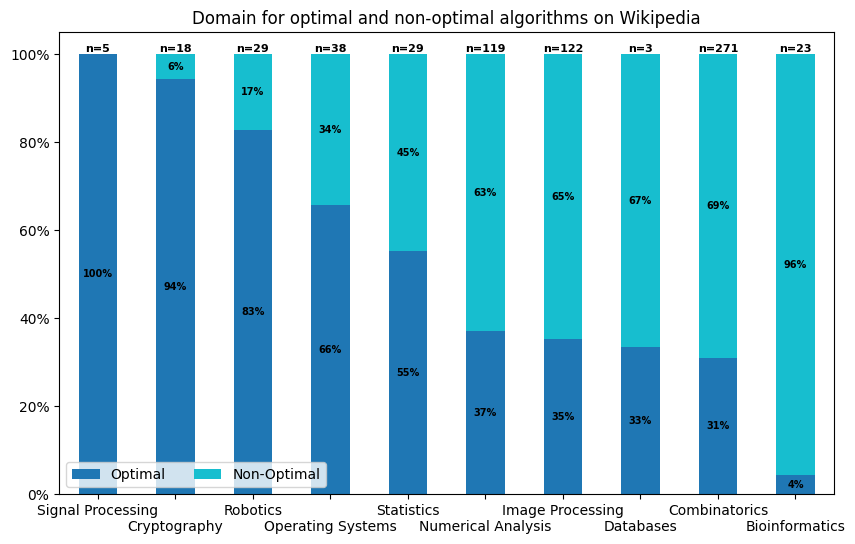

In [ ]:
# What fraction of Wikipedia algorithms are optimal by domain?

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
df = df[['One of them','is_optimal','Domains']]
df = df.replace('#VALUE!', pd.NA).dropna()
merged_dict = df.to_dict(orient='records')
for algo in merged_dict:
    if algo['is_optimal'] == 1:
        algo['optimal?'] = 'Optimal'
    elif algo['is_optimal'] == 0:
        algo['optimal?'] = 'Non-Optimal'
df = pd.DataFrame(merged_dict)
df = df.loc[df['One of them'] == 1]

# df.to_csv('/Users/bellasteedly/Desktop/results.csv')

cross_tab = pd.crosstab(index=df['Domains'], columns=df['optimal?'])
cross_tab = cross_tab.reindex(["Signal Processing", "Cryptography", "Robotics", "Operating Systems", "Statistics", "Numerical Analysis", "Image Processing", "Databases", "Combinatorics", "Bioinformatics"])
cross_tab = cross_tab[['Optimal', 'Non-Optimal']]

cross_tab_prop = pd.crosstab(index=df['Domains'], columns=df['optimal?'], normalize="index")
cross_tab_prop = cross_tab_prop.reindex(["Signal Processing", "Cryptography", "Robotics", "Operating Systems", "Statistics", "Numerical Analysis", "Image Processing", "Databases", "Combinatorics", "Bioinformatics"])
cross_tab_prop = cross_tab_prop[['Optimal', 'Non-Optimal']]
cross_tab_prop *= 100
cross_tab_prop.to_csv('/Users/bellasteedly/Desktop/results.csv')

cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel('')
plt.title("Domain for optimal and non-optimal algorithms on Wikipedia")


bin_labels = ["Signal Processing", "\nCryptography", "Robotics", "\nOperating Systems", "Statistics", "\nNumerical Analysis", "Image Processing", "\nDatabases", "Combinatorics", "\nBioinformatics"]

# Set the x-ticks and x-tick labels
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=0, ha='center')

for n, x in enumerate([*cross_tab_prop.index.values]):
    sum = 0
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        sum += count
    plt.text(x=n,
                 y=(y_loc),
                 s="n=" + str(sum), 
                 color="black",
                 ha='center',
                 va='bottom',
                 fontsize=8,
                 fontweight="bold")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()): 
        if (count != 0):
            plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{int(round(proportion, 0))}%', 
                 color="black",
                 fontsize=7,
                 ha='center',
                 va='center',
                 fontweight="bold")

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/domain_optimal.pdf')

Text(0.5, 0, 'Non-Optimal Views')

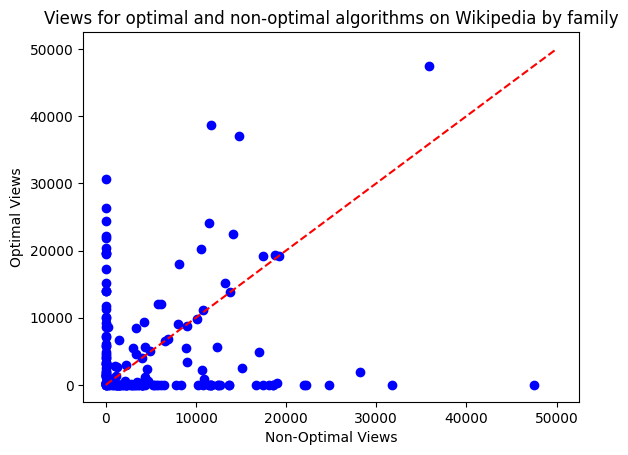

In [ ]:
# Average views for optimal vs non-optimal algorithms in each family
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
#print(df.to_dict(orient='records'))
df = df[['One of them','Family Name', 'is_optimal', 'avg_monthly_reads']]
df = df.replace('#VALUE!', pd.NA).dropna()
merged_dict = df.to_dict(orient='records')
family = merged_dict[0]['Family Name']
optimal_count = 0
non_optimal_count = 0
optimal_views = 0
non_optimal_views = 0
final_dict = []
for algo in merged_dict:
    if algo['One of them'] == 1:
        if algo['Family Name'] == family:
            if algo['is_optimal'] == True:
                optimal_views += algo['avg_monthly_reads']
                optimal_count += 1
            elif algo['is_optimal'] == False:
                non_optimal_views += algo['avg_monthly_reads']
                non_optimal_count += 1
        if algo['Family Name'] != family:
            if optimal_count > 0:
                optimal_monthly = optimal_views/optimal_count
            else:
                optimal_monthly = 0
            if non_optimal_count > 0:   
                non_optimal_monthly = non_optimal_views/non_optimal_count
            else:
                non_optimal_monthly = 0
            final_dict.append({'Family Name': family, 'Optimal Monthly Views': optimal_monthly, 'Non-Optimal Monthly Views': non_optimal_monthly})
            family = algo['Family Name']
            optimal_count = 0
            non_optimal_count = 0
            optimal_views = 0
            non_optimal_views = 0
            if algo['is_optimal'] == True:
                optimal_views += algo['avg_monthly_reads']
                optimal_count += 1
            elif algo['is_optimal'] == False:
                non_optimal_views += algo['avg_monthly_reads']
                non_optimal_count += 1
#print(final_dict)

df = pd.DataFrame(final_dict)


fig, ax = plt.subplots()

# Scatterplot using data from the DataFrame
ax.scatter(df['Non-Optimal Monthly Views'], df['Optimal Monthly Views'], color='blue')

# Create a 45-degree line
x = np.linspace(0, 50000, 100)  # Adjust the range as needed
y = x  # y = x for a 45-degree line

# Plot the 45-degree line
ax.plot(x, y, label='45-Degree Line', color='red', linestyle='--')
plt.title('Views for optimal and non-optimal algorithms on Wikipedia by family')
ax.set_ylabel('Optimal Views')
ax.set_xlabel('Non-Optimal Views')


#df.plot.scatter(x = 'Non-Optimal Monthly Views', y = 'Optimal Monthly Views')



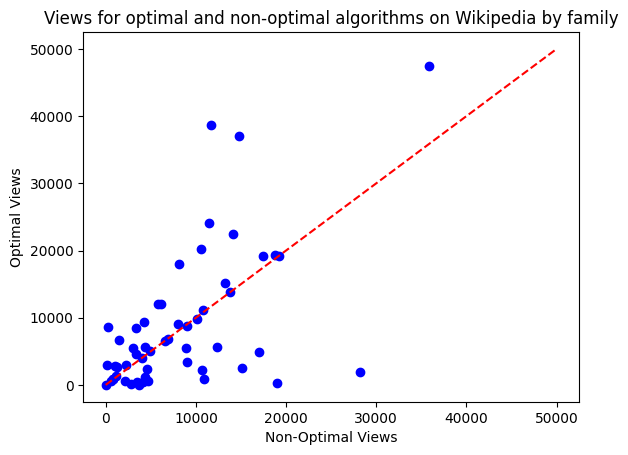

In [ ]:
# Average views for optimal vs non-optimal algorithms in each family
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
#print(df.to_dict(orient='records'))
df = df[['One of them','Family Name', 'is_optimal', 'average_monthly_reads']]
df = df.replace('#VALUE!', pd.NA).dropna()
merged_dict = df.to_dict(orient='records')
family = merged_dict[0]['Family Name']
optimal_count = 0
non_optimal_count = 0
optimal_views = 0
non_optimal_views = 0
final_dict = []
for algo in merged_dict:
    if algo['One of them'] == 1:
        if algo['Family Name'] == family:
            if algo['is_optimal'] == True:
                optimal_views += algo['average_monthly_reads']
                optimal_count += 1
            elif algo['is_optimal'] == False:
                non_optimal_views += algo['average_monthly_reads']
                non_optimal_count += 1
        if algo['Family Name'] != family:
            if optimal_count > 0 and non_optimal_count > 0:
                optimal_monthly = optimal_views/optimal_count  
                non_optimal_monthly = non_optimal_views/non_optimal_count
                final_dict.append({'Family Name': family, 'Optimal Monthly Views': optimal_monthly, 'Non-Optimal Monthly Views': non_optimal_monthly})
            family = algo['Family Name']
            optimal_count = 0
            non_optimal_count = 0
            optimal_views = 0
            non_optimal_views = 0
            if algo['is_optimal'] == True:
                optimal_views += algo['average_monthly_reads']
                optimal_count += 1
            elif algo['is_optimal'] == False:
                non_optimal_views += algo['average_monthly_reads']
                non_optimal_count += 1
#print(final_dict)

df = pd.DataFrame(final_dict)


fig, ax = plt.subplots()

# Scatterplot using data from the DataFrame
ax.scatter(df['Non-Optimal Monthly Views'], df['Optimal Monthly Views'], color='blue')

# Create a 45-degree line
x = np.linspace(0, 50000, 100)  # Adjust the range as needed
y = x  # y = x for a 45-degree line

# Plot the 45-degree line
ax.plot(x, y, label='45-Degree Line', color='red', linestyle='--')
plt.title('Views for optimal and non-optimal algorithms on Wikipedia by family')
ax.set_ylabel('Optimal Views')
ax.set_xlabel('Non-Optimal Views')


#df.plot.scatter(x = 'Non-Optimal Monthly Views', y = 'Optimal Monthly Views')
plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/views_optimal_algos2.pdf')

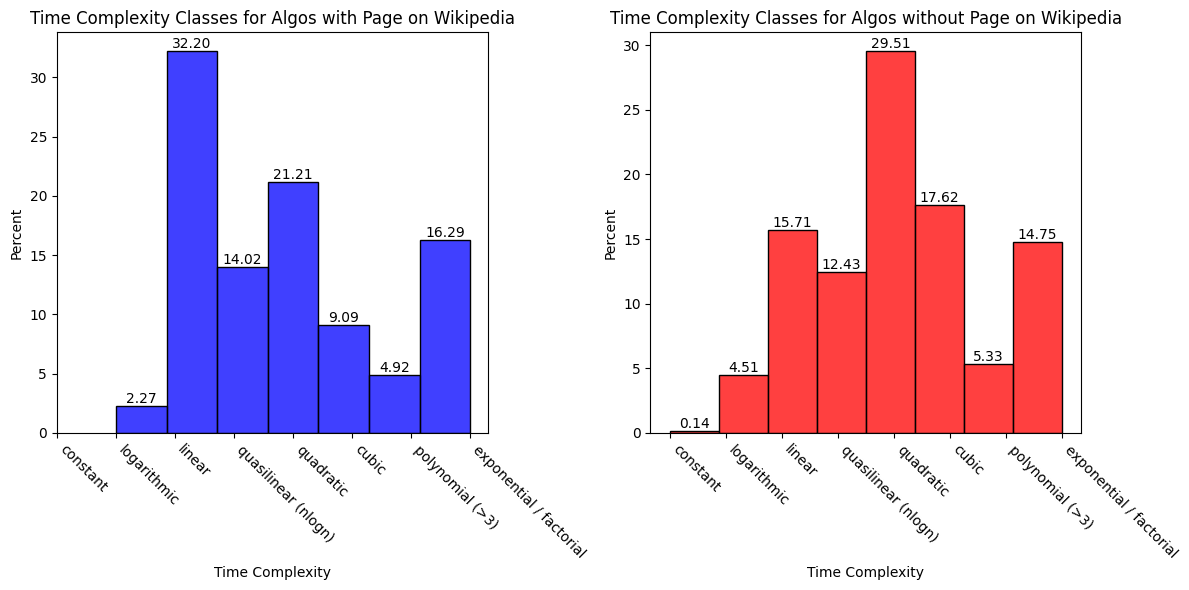

KS Statistic: 0.16703924490809738
P-value: 3.335804867991863e-05
The two datasets are significantly different (reject the null hypothesis)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import wasserstein_distance
from scipy.stats import chi2_contingency

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
merged_dict = df.to_dict(orient='records')

wiki_complexity_classes = []
non_wiki_complexity_classes = []
for algo in merged_dict:
    if algo['Time Complexity Class'] != '#VALUE!':
        if algo['Has dedicated page?'] == 1:
            wiki_complexity_classes.append(float(algo['Time Complexity Class']))
            if algo['Time Complexity Class'] == 1:
                print(algo)
        else:
            non_wiki_complexity_classes.append(float(algo['Time Complexity Class']))

bin_edges = [1, 2, 3, 4, 5, 6, 7, 8]
bin_labels = ['constant', 'logarithmic', 'linear', 'quasilinear (nlogn)', 'quadratic', 'cubic', 'polynomial (>3)', 'exponential / factorial']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the histogram for wiki_complexity_classes
ax1 = sns.histplot(wiki_complexity_classes, kde=False, bins=7, stat='percent', color='blue', edgecolor='black', ax=axes[0])
ax1.set_title('Time Complexity Classes for Algos with Page on Wikipedia')
ax1.set_xlabel('Time Complexity')
ax1.set_ylabel('Percent')
ax1.set_xticks(bin_edges)
ax1.set_xticklabels(bin_labels, rotation=-45, ha='left')

# Add heights (percentages) on top of bars in the first subplot
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Plot the histogram for non_wiki_complexity_classes
ax2 = sns.histplot(non_wiki_complexity_classes, kde=False, bins=8, stat='percent', color='red', edgecolor='black', ax=axes[1])
ax2.set_title('Time Complexity Classes for Algos without Page on Wikipedia')
ax2.set_xlabel('Time Complexity')
ax2.set_ylabel('Percent')
ax2.set_xticks(bin_edges)
ax2.set_xticklabels(bin_labels, rotation=-45, ha='left')

# Add heights (percentages) on top of bars in the second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Perform K-S test:
ks_statistic, p_value = ks_2samp(wiki_complexity_classes, non_wiki_complexity_classes)

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("The two datasets are significantly different (reject the null hypothesis)")
else:
    print("There is no significant difference between the two datasets (fail to reject the null hypothesis)")

# # Compute the Earth Mover's Distance (EMD)
# emd_distance = wasserstein_distance(wiki_complexity_classes, non_wiki_complexity_classes)

# print("Earth Mover's Distance:", emd_distance)

# # Chi-squared test:
# # Create a contingency table
# observed_frequencies = np.array([[
#     len([x for x in wiki_complexity_classes if x == class_label]),
#     len([x for x in non_wiki_complexity_classes if x == class_label])
# ] for class_label in range(1, 9)])

# # Perform the chi-squared test
# chi2, p, _, _ = chi2_contingency(observed_frequencies)

# print("Chi-Squared Statistic:", chi2)
# print("P-value:", p)

# # Interpret the result
# alpha = 0.05  # Significance level
# if p < alpha:
#     print("The two datasets are significantly different (reject the null hypothesis)")
# else:
#     print("There is no significant difference between the two datasets (fail to reject the null hypothesis)")


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
merged_dict = df.to_dict(orient='records')

linear_algos = []

for algo in merged_dict:
    if str(algo['One of them']) == '1':
        if str(algo['Time Complexity Class']) == '3':
            linear_algos.append(algo)
            df = pd.DataFrame(linear_algos)
            df.to_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/linearalgos.csv', index=False)
# print(linear_algos)


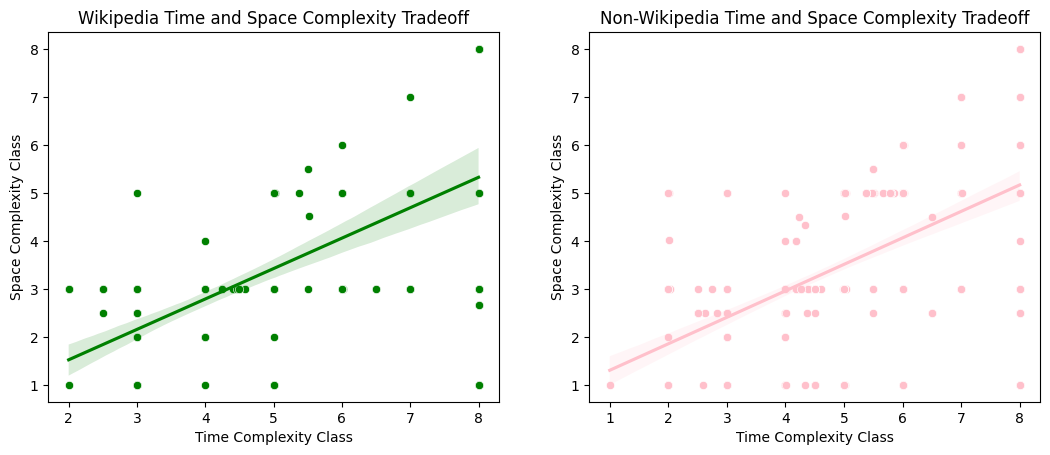

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
merged_dict = df.to_dict(orient='records')

df = df[['Time Complexity Class', 'Space Complexity Class', 'Has dedicated page?']]
df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
df['Space Complexity Class'] = df['Space Complexity Class'].replace('#VALUE!', pd.NA)
df = df.dropna()

# change the type to a float
df['Time Complexity Class'] = df['Time Complexity Class'].astype(float)
df['Space Complexity Class'] = df['Space Complexity Class'].astype(float)

df_wiki = df[df['Has dedicated page?'] == 1]
df_non_wiki = df[df['Has dedicated page?'] == 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

# Scatter plots
sns.scatterplot(x='Time Complexity Class', y='Space Complexity Class', data=df_wiki, color='green', ax=ax1)
sns.scatterplot(x='Time Complexity Class', y='Space Complexity Class', data=df_non_wiki, color='pink', ax=ax2)

# Regression lines
sns.regplot(x='Time Complexity Class', y='Space Complexity Class', data=df_wiki, scatter=False, color='green', ax=ax1)
sns.regplot(x='Time Complexity Class', y='Space Complexity Class', data=df_non_wiki, scatter=False, color='pink', ax=ax2)

# Set titles and labels
ax1.set_title("Wikipedia Time and Space Complexity Tradeoff")
ax2.set_title("Non-Wikipedia Time and Space Complexity Tradeoff")

ax1.set_xlabel("Time Complexity Class")
ax1.set_ylabel("Space Complexity Class")

ax2.set_xlabel("Time Complexity Class")

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/time_space_tradeoff1.pdf')

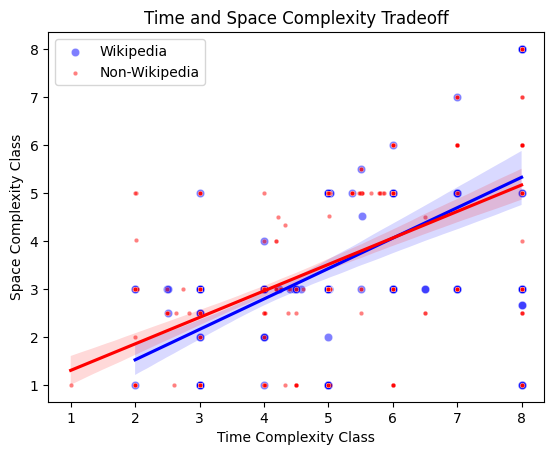

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
merged_dict = df.to_dict(orient='records')

df = df[['Time Complexity Class', 'Space Complexity Class', 'Has dedicated page?']]
df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
df['Space Complexity Class'] = df['Space Complexity Class'].replace('#VALUE!', pd.NA)
df = df.dropna()

# change the type to a float
df['Time Complexity Class'] = df['Time Complexity Class'].astype(float)
df['Space Complexity Class'] = df['Space Complexity Class'].astype(float)

df_wiki = df[df['Has dedicated page?'] == 1]
df_non_wiki = df[df['Has dedicated page?'] == 0]

# Create the scatter plot
plt.figure(figsize=(6.4, 4.8))

# Scatter plots with adjusted transparency (alpha)
sns.scatterplot(x='Time Complexity Class', y='Space Complexity Class', data=df_wiki, color='blue', label='Wikipedia', alpha=0.5)
sns.scatterplot(x='Time Complexity Class', y='Space Complexity Class', data=df_non_wiki, color='red', label='Non-Wikipedia', alpha=0.5, s=10)

# Regression lines
sns.regplot(x='Time Complexity Class', y='Space Complexity Class', data=df_wiki, scatter=False, color='blue')
sns.regplot(x='Time Complexity Class', y='Space Complexity Class', data=df_non_wiki, scatter=False, color='red')

# Set title and labels
plt.title("Time and Space Complexity Tradeoff")
plt.xlabel("Time Complexity Class")
plt.ylabel("Space Complexity Class")

# Display legend
plt.legend()

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/time_space_tradeoff2.pdf')

/var/folders/w7/lcn8swqx1bq7r1dqcdby_4mc0000gn/T/ipykernel_66901/2627185094.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_wiki['Time Complexity Class'] += shift_value
/var/folders/w7/lcn8swqx1bq7r1dqcdby_4mc0000gn/T/ipykernel_66901/2627185094.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki['Time Complexity Class'] -= shift_value


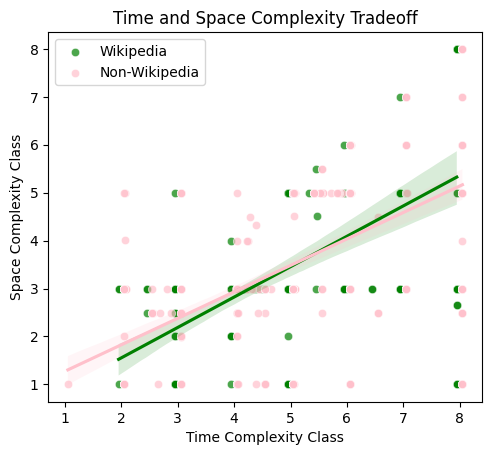

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
merged_dict = df.to_dict(orient='records')

df = df[['Time Complexity Class', 'Space Complexity Class', 'Has dedicated page?']]
df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
df['Space Complexity Class'] = df['Space Complexity Class'].replace('#VALUE!', pd.NA)
df = df.dropna()

# change the type to a float
df['Time Complexity Class'] = df['Time Complexity Class'].astype(float)
df['Space Complexity Class'] = df['Space Complexity Class'].astype(float)

df_wiki = df[df['Has dedicated page?'] == 1]
df_non_wiki = df[df['Has dedicated page?'] == 0]

# Shift all points in the non-Wikipedia plot to the right by adding a constant value
shift_value = 0.05
df_non_wiki['Time Complexity Class'] += shift_value
df_wiki['Time Complexity Class'] -= shift_value

# Create the scatter plot
plt.figure(figsize=(5.6, 4.8))

# Scatter plot for Wikipedia data points
sns.scatterplot(x='Time Complexity Class', y='Space Complexity Class', data=df_wiki, color='green', label='Wikipedia', alpha=0.7)

# Scatter plot for Non-Wikipedia data points with smaller size and shifted to the right
sns.scatterplot(x='Time Complexity Class', y='Space Complexity Class', data=df_non_wiki, color='pink', label='Non-Wikipedia', alpha=0.7)

# Regression lines
sns.regplot(x='Time Complexity Class', y='Space Complexity Class', data=df_wiki, scatter=False, color='green')
sns.regplot(x='Time Complexity Class', y='Space Complexity Class', data=df_non_wiki, scatter=False, color='pink')

# Set title and labels
plt.title("Time and Space Complexity Tradeoff")
plt.xlabel("Time Complexity Class")
plt.ylabel("Space Complexity Class")

# Display legend
plt.legend()

plt.savefig('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/Figures/options/time_space_tradeoff3.pdf')

In [9]:
import pandas as pd
optimal_algos = {}
clean_dict = {}

def change_duplicate_names():
    df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
    df = df[['Time Complexity Class', 'Space Complexity Class', 'Family Name', 'Algorithm Name', 'One of them', 'is_optimal']]
    df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
    df['Space Complexity Class'] = df['Space Complexity Class'].replace('#VALUE!', pd.NA)
    df = df.dropna()
    merged_dict = df.to_dict(orient='records')
    # print(merged_dict)
    algo_list = []
    index = 0
    count = 1
    for algo in merged_dict:
        if algo['Algorithm Name'] not in algo_list:
            algo_list.append(algo['Algorithm Name'])
        else:
            merged_dict[index] = {'Time Complexity Class': algo['Time Complexity Class'], 'Space Complexity Class': algo['Space Complexity Class'], 'Family Name': algo['Family Name'], 'Algorithm Name': algo['Algorithm Name'] + ' ' + str(count), 'One of them': algo['One of them'], 'is_optimal': algo['is_optimal']}
            algo_list.append('Algorithm Name' + ' ' + str(count))
            count += 1
        index += 1
    return merged_dict

def clean_data(merged_dict):
    for algo in merged_dict:
        clean_dict[algo['Algorithm Name']] = {'Time Complexity Class': algo['Time Complexity Class'], 'Space Complexity Class': algo['Space Complexity Class'], 'Family Name': algo['Family Name'], 'Wikipedia': algo['One of them'], 'is_optimal': algo['is_optimal']}

def dominates(algo1, algo2):
    # returns True if algo1 dominates algo2, False otherwise

    # returns a boolean for whether algo1 has a better time and space complexity than algo2 or algo1 
    # has the same time complexity and a better space complexity than algo2 or algo1 has a better time 
    # complexity and the same space complexity than algo2
    algo1_time = float(clean_dict[algo1]['Time Complexity Class'])
    algo1_space = float(clean_dict[algo1]['Space Complexity Class'])
    algo2_time = float(clean_dict[algo2]['Time Complexity Class'])
    algo2_space = float(clean_dict[algo2]['Space Complexity Class'])
    if (algo1_time < algo2_time) and (algo1_space <= algo2_space):
        return True
    elif (algo1_time <= algo2_time) and (algo1_space < algo2_space):
        return True
    else:
        return False

def pareto_optimal_algos():
    # returns a list of algorithms that are on the pareto frontier
    # if it's not dominated by a current best algorithm in the family, add it to the hash table. If it dominates any algorithms currently in the hash table, remove those
    for key, value in clean_dict.items():
        dominated = False
        if value['Family Name'] not in optimal_algos: # if there is nothing in that family, add it
            optimal_algos[value['Family Name']] = [key]
        elif value['Family Name'] in optimal_algos: # if there is something in that family
            for algo2 in optimal_algos[value['Family Name']]:
                if dominates(key, algo2):
                    optimal_algos[value['Family Name']].remove(algo2)
                if dominates(algo2, key): # if there is an algorithm that dominates it don't add it
                    dominated = True
            if dominated == False:
                optimal_algos[value['Family Name']].append(key)

def wiki_fraction():
    # fraction of wikipedia algorithms on the pareto frontier
    total_algos = 0
    wiki_pareto_frontier = 0
    wiki_total = 0
    for key, value in clean_dict.items():
        total_algos += 1
        if value['Wikipedia'] == 1: # if the algorithm is on Wikipedia
            wiki_total += 1
            for algo in optimal_algos[value['Family Name']]: #####
                if key == algo:
                    wiki_pareto_frontier += 1
    fraction = wiki_pareto_frontier/wiki_total
    return fraction

def family_fraction():
    # fraction of families with a pareto frontier algorithm on wikipedia
    problems_wiki = 0 # number of families with pareto frontier algorithms on wikipedia
    problems_total = 0 # total number of families
    time_optimal_wiki = 0
    for key, value in optimal_algos.items():
        on_wiki = False
        time_wiki = False
        for algo in value:
            if clean_dict[algo]['Wikipedia'] == 1:
                on_wiki = True
                if clean_dict[algo]['is_optimal'] == True:
                    time_wiki = True
        if on_wiki:
            problems_wiki += 1
        if time_wiki:
            time_optimal_wiki += 1
        problems_total += 1
    fraction = problems_wiki/problems_total
    time_fraction = time_optimal_wiki/problems_total
    print("Fraction of problem families that have an algorithm on the pareto frontier on Wikipedia: " + str(fraction))
    print("Fraction of problem families that have an optimal time complexity algorithm on Wikipedia: " + str(time_fraction))

def optimal_time():
    optimal = 0
    total = 0
    for key, value in clean_dict.items():
        if value['Wikipedia'] == 1:
            if value['is_optimal'] == True:
                optimal += 1
        total += 1
    return str(optimal/total)




# 1: constant
# 2: logarithmic
# 3: linear
# 4: quasilinear (n log n)
# 5: quadratic
# 6: cubic
# 7: polynomial (>3)
# 8: exponential / factorial

def main():
    merged_dict = change_duplicate_names()
    clean_data(merged_dict)
    pareto_optimal_algos()
    family_fraction()
    print("Fraction of Wikipedia algorithms on the Pareto Frontier: " + str(wiki_fraction()))
    print("Fraction of algorithms on Wikipedia that have an optimal time complexity: " + str(optimal_time()))

    
if __name__ == "__main__":
    main()

Fraction of problem families that have an algorithm on the pareto frontier on Wikipedia: 0.7692307692307693
Fraction of problem families that have an optimal time complexity algorithm on Wikipedia: 0.6615384615384615
Fraction of Wikipedia algorithms on the Pareto Frontier: 0.44341372912801486
Fraction of algorithms on Wikipedia that have an optimal time complexity: 0.27818627450980393


In [36]:
import pandas as pd
optimal_algos = {}
clean_dict = {}

# Iterate through the list of dictionaries and find min time complexity class for each family
def find_min_space():
    df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
    df = df[df['Space Complexity Class'] != '#VALUE!']
    min_space_complexities = {}
    data = df.to_dict(orient='records')
    for entry in data:
        family_name = entry['Family Name']
        space_complexity_class = entry['Space Complexity Class']
    
        if family_name not in min_space_complexities:
            min_space_complexities[family_name] = space_complexity_class
        else:
            min_space_complexities[family_name] = min(min_space_complexities[family_name], space_complexity_class)
    
    # Iterate through the list of dictionaries and add the min_time_complexity_class to each entry
    for entry in data:
        family_name = entry['Family Name']
        entry['min_space_complexity_class'] = min_space_complexities[family_name]
        if entry['min_space_complexity_class'] == entry['Space Complexity Class']:
            entry['is_optimal_space'] = True
        else:
            entry['is_optimal_space'] = False
    df = pd.DataFrame.from_dict(data)
    df.to_csv("merged_space.csv")

def change_duplicate_names():
    df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged1.csv')
    df = df[['Time Complexity Class', 'Space Complexity Class', 'Family Name', 'Algorithm Name', 'One of them', 'is_optimal', 'Derived Space Complexity?']]
    df['Time Complexity Class'] = df['Time Complexity Class'].replace('#VALUE!', pd.NA)
    df['Space Complexity Class'] = df['Space Complexity Class'].replace('#VALUE!', pd.NA)
    df = df.dropna()
    merged_dict = df.to_dict(orient='records')
    # print(merged_dict)
    algo_list = []
    index = 0
    count = 1
    for algo in merged_dict:
        if algo['Algorithm Name'] not in algo_list:
            algo_list.append(algo['Algorithm Name'])
        else:
            merged_dict[index] = {'Time Complexity Class': algo['Time Complexity Class'], 'Space Complexity Class': algo['Space Complexity Class'], 'Family Name': algo['Family Name'], 'Algorithm Name': algo['Algorithm Name'] + ' ' + str(count), 'One of them': algo['One of them'], 'is_optimal': algo['is_optimal'], 'Derived': algo['Derived Space Complexity?']}
            algo_list.append('Algorithm Name' + ' ' + str(count))
            count += 1
        index += 1
    return merged_dict

def clean_data(merged_dict):
    for algo in merged_dict:
        clean_dict[algo['Algorithm Name']] = {'Time Complexity Class': algo['Time Complexity Class'], 'Space Complexity Class': algo['Space Complexity Class'], 'Family Name': algo['Family Name'], 'Wikipedia': algo['One of them'], 'is_optimal': algo['is_optimal'], 'Derived': algo['Derived Space Complexity?']}



# Fraction of best space, non-derived algos on wiki vs fraction of best space algos on wiki
def compare_derived_algos():
    df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged1.csv')
    df = df[['is_optimal_space', 'Derived Space Complexity?', 'One of them']]
    data = df.to_dict(orient='records')
    best_non_derived_wiki = 0
    best_non_derived = 0
    best_derived = 0
    best = 0
    best_wiki = 0
    for algo in data:
        if (algo['is_optimal_space'] == 1) and (algo['Derived Space Complexity?'] == 0) and (algo['One of them'] == 1):
            best_non_derived_wiki+=1
        if (algo['is_optimal_space'] == 1):
            best+=1
        if (algo['is_optimal_space'] == 1) and (algo['Derived Space Complexity?'] == 1):
            best_derived += 1
        if (algo['is_optimal_space'] == 1) and (algo['One of them'] == 1):
            best_wiki += 1
        if (algo['is_optimal_space'] == 1) and (algo['Derived Space Complexity?'] == 0):
            best_non_derived += 1
        
        
    result1 = best_derived/best
    result2 = best_wiki/best
    result3 = best_non_derived_wiki/best_non_derived
    print("What fraction of the best space complexity algorithms were derived by us? " + str(result1))
    print("How often is the best space complexity algo on Wikipedia? " + str(result2))
    print("What fraction of the best non-derived algos are on Wikipedia? " + str(result3))








# 1: constant
# 2: logarithmic
# 3: linear
# 4: quasilinear (n log n)
# 5: quadratic
# 6: cubic
# 7: polynomial (>3)
# 8: exponential / factorial

def main():
    find_min_space()
    compare_derived_algos()

    
if __name__ == "__main__":
    main()

What fraction of the best space complexity algorithms were derived by us? 0.8181818181818182
How often is the best space complexity algo on Wikipedia? 0.6828752642706131
What fraction of the best non-derived algos are on Wikipedia? 0.6428571428571429


In [3]:
# Look at families where optimal time algo is not on Wikipedia. Scatterplot of publication dates for on Wiki and not on Wiki
import matplotlib as plt

def optimal_time_not_on_wiki():
    df = pd.read_csv('/Users/bellasteedly/Library/Mobile Documents/com~apple~CloudDocs/AlgorithmsWiki/wikipedia/merged.csv')
    df = df[['is_optimal', 'One of them', 'Year']]
    data = df.to_dict(orient='records')
    publication_date_not_on_wiki = []
    publication_date_on_wiki = []
    for algo in data:
        if algo['is_optimal'] == 1:
            if algo['One of them'] == 1:
                publication_date_on_wiki.append(algo['Year'])
            elif algo['One of them'] == 0:
                publication_date_not_on_wiki.append(algo['Year'])
    avg_on_wiki = sum(publication_date_on_wiki)/len(publication_date_on_wiki)
    avg_non_wiki = sum(publication_date_not_on_wiki)/len(publication_date_not_on_wiki)
    print("Average publication date for optimal time algorithms on Wikipedia: " + str(avg_on_wiki))
    print("Average publication date for optimal time algorithms not on Wikipedia: " + str(avg_non_wiki))

    plt.scatter(publication_date_on_wiki, publication_date_not_on_wiki)
    plt.show()




def main():
    optimal_time_not_on_wiki()

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'matplotlib'